In [41]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

Reading Data


In [20]:

df = pd.read_csv('house_data.csv')
df

,area,bedrooms,age,price
0,2600,3.0,0,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Preprocessing data 

In [22]:
#calculating median of bedrooms to fill NaN values
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [23]:
df['bedrooms'] = df.bedrooms.fillna(median_bedrooms)
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

Training the model

In [24]:
#first lets rescale all of our features
df.area = (df.area-df['area'].mean())/(df['area'].max()-df['area'].min())
df.bedrooms = (df.bedrooms-df['bedrooms'].mean())/(df['bedrooms'].max()-df['bedrooms'].min())
df.age = (df.age-df['age'].mean())/(df['age'].max()-df['age'].min())
df

,area,bedrooms,age,price
0,-0.485714,-0.3,-0.473333,550000
1,-0.200000,0.2,0.026667,565000
2,-0.057143,-0.3,0.126667,610000
3,0.228571,-0.3,0.526667,595000
4,0.514286,0.7,-0.206667,760000


In [39]:
#definning the linear regression model
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

m = X.shape[0]
print(m)

def linearRegression(X,Y,alpha,epoch):
  #lets first add column of ones to our data
  ones = np.ones((m,1))
  X = np.concatenate((ones,X),axis=1) 
  #defining the function or hypothesis
  n = X.shape[1]
  w = np.ones(n)
  h = np.dot(X,w)

  #gradient descent algorithm
  cost = np.ones(epoch)

  for i in range(0,epoch):
    w[0] = w[0] - (alpha/m) * sum(h-Y)
    for j in range(1,n):
      w[j] = w[j] - (alpha/m)*sum((h-Y) * X[:,j])
    
    h = np.dot(X,w)
    cost[i] = 1/(2*m)* sum(np.square(h-Y))

  return cost,w
  


5


In [57]:
#getting the cost and w
cost,w  = linearRegression(X,Y,0.3,1500)
print(cost)
print(w)

[9.54737711e+10 4.77911994e+10 2.43238981e+10 ... 7.16448995e+07
 7.16448979e+07 7.16448964e+07]
[ 616000.          236019.14570318   -2906.77247994 -119234.79464563]


In [58]:
#getting prediction now
X_pred = np.array([1,0.5,0.7,-0.2])
Y_pred = np.dot(X_pred, w)
print("first model: ")
print(Y_pred)
print("second model: ")
X_pred = np.array([1,-0.22,0.5,0.33])
Y_pred = np.dot(X_pred, w)
print(Y_pred)

first model: 
755821.7910447594
second model: 
523274.9194722703


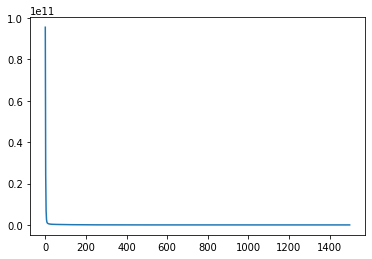

lowest cost =  71644896.3720527


In [59]:
#plotting the cot function
plt.plot(cost)
xlabel = 'epoch or iterations'
ylabel = 'cost or loss'
plt.show()
print('lowest cost = ', cost.min())

In [45]:
#lets comapre these values with sklearns model
lm = linear_model.LinearRegression()
lm.fit(X,Y)


LinearRegression()

In [47]:
lm.predict([[0.5,0.7,-0.2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([755831.57894737])

In [60]:
lm.predict([[-0.22,0.5,0.33]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([523193.22368421])

our gradient descent algorithm and sklearn model are almost preddicting the same value. hence we got a perfect model.